In [1]:
import pandas as pd
import numpy as np
import operator
import datetime
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
TEIS_df = pd.read_excel('../data/TEIS Referral Data for NSS Compiled Monthly.xlsx')
TEIS_df

,POE,Child ID,DOB,County Name,County SES,Child Phase,Active,Service Coordinator,Notification/ Referral Date,Parent Consent Date,...,Service Coordinator Counter,Fiscal Year.1,Child Count,2012 Child Count,2013 Child Count,third DOB,Late Referral,Qtr,QTR,Referral Source Category
0,ET,403339,2014-08-09,Blount,Transitional,Eligibility,A,Kristi Borer,2016-07-01,2016-07-01,...,1,2016,1,NaN,NaN,2017-08-09,NaN,1,Qtr 1,NaN
1,FT,404085,2013-07-31,Unicoi,At-Risk,Notification,I,Jennifer Terranera - 45 days,2016-07-01,NaT,...,1,2016,1,NaN,NaN,2016-07-31,1.0,1,Qtr 1,NaN
2,FT,403623,2016-02-05,Sullivan,Transitional,Eligibility,A,Amy Talbert,2016-07-01,2016-07-20,...,1,2016,1,NaN,NaN,2019-02-05,NaN,1,Qtr 1,NaN
3,FT,404157,2015-12-06,Sullivan,Transitional,IFSP,A,Candice Cradic,2016-07-01,2016-07-22,...,1,2016,1,NaN,NaN,2018-12-06,NaN,1,Qtr 1,NaN
4,FT,404154,2015-04-18,Hawkins,At-Risk,IFSP,A,Kathy Jeffries,2016-07-01,2016-07-18,...,1,2016,1,NaN,NaN,2018-04-18,NaN,1,Qtr 1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113251,UC,528759,2021-04-07,Sumner,Competitive,Evaluation,A,Sherry Roberts-DS,2022-05-16,2022-05-26,...,1,2021,1,NaN,NaN,2024-04-07,NaN,4,Qtr 4,NaN
113252,UC,528534,2022-03-13,Sumner,Competitive,IFSP,A,Robyn Hogan,2022-05-11,2022-05-23,...,1,2021,1,NaN,NaN,2025-03-13,NaN,4,Qtr 4,NaN
113253,UC,528430,2022-01-05,Cumberland,Transitional,Eligibility,A,Lisa Davis,2022-05-10,2022-05-18,...,1,2021,1,NaN,NaN,2025-01-05,NaN,4,Qtr 4,NaN
113254,UC,528253,2020-09-12,Sumner,Competitive,IFSP,A,Taylor Lee,2022-05-06,2022-05-11,...,1,2021,1,NaN,NaN,2023-09-12,NaN,4,Qtr 4,NaN


In [3]:
TEIS_July2022 = pd.read_excel('../data/TEIS Referral Data for NSS pulled 7-1-22.xlsx')
TEIS_July2022

,POE,Child ID,DOB,County Name,County SES,Child Phase,Active,Service Coordinator,Notification Date,Parent Consent Date,Referral Source Type Name,Initial Eligibility,Initial Eligibility Date,Initial IFSP Date,Latest IFSP Date,Exit Reason,Exit Date
0,ET,411812,2016-12-14,Blount,Transitional,Notification,I,Charity Decker,2016-12-16,NaT,DCS,NaN,NaT,NaT,NaT,Unable to contact,2016-12-29
1,ET,417398,2015-04-06,Knox,Transitional,Eligibility,I,Jackie Campbell,2017-04-24,2017-05-02,Parent,Ineligible,2017-05-16,NaT,NaT,Ineligible for Part C,2017-05-16
2,ET,419400,2016-03-04,Roane,Transitional,Notification,I,Kelly Brackney,2017-06-06,NaT,DCS,NaN,NaT,NaT,NaT,Parent decline,2017-06-30
3,ET,397571,2015-05-11,Knox,Transitional,Eligibility,I,Wendy Burton,2017-05-24,2017-06-13,Other,Ineligible,2017-06-16,NaT,NaT,Ineligible for Part C,2017-06-16
4,ET,404648,2015-09-23,Knox,Transitional,IFSP,I,Sarah Scott,2016-07-18,2016-07-28,Other,Eligible,2016-08-01,2016-08-16,2018-07-24,618 - Part B eligibility not determined,2018-09-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96575,UC,519094,2020-04-10,Macon,Transitional,Eligibility,I,Sherry Roberts-DS,2022-01-12,2022-01-19,PCP,Ineligible,2022-01-31,NaT,NaT,Ineligible for Part C,2022-01-31
96576,UC,528253,2020-09-12,Sumner,Competitive,IFSP,A,Taylor Lee,2022-05-06,2022-05-11,PCP,Eligible,2022-05-23,2022-05-31,2022-05-31,NaN,NaT
96577,UC,525460,2019-08-27,Sumner,Competitive,Notification,I,Sherry Roberts-DS,2022-03-29,NaT,PCP,NaN,NaT,NaT,NaT,Unable to contact,2022-04-11
96578,UC,528535,2022-02-08,Smith,Transitional,Evaluation,A,Sherry Roberts-DS,2022-05-11,2022-05-27,Parent,NaN,NaT,NaT,NaT,NaN,NaT


In [4]:
#check the type of data
type(TEIS_df)

pandas.core.frame.DataFrame

In [5]:
type(TEIS_July2022)

pandas.core.frame.DataFrame

# data cleaning process

In [6]:
july = TEIS_July2022.rename(columns = {'Notification Date' : 'Notification/ Referral Date','County SES ' : 'County SES'})
july

,POE,Child ID,DOB,County Name,County SES,Child Phase,Active,Service Coordinator,Notification/ Referral Date,Parent Consent Date,Referral Source Type Name,Initial Eligibility,Initial Eligibility Date,Initial IFSP Date,Latest IFSP Date,Exit Reason,Exit Date
0,ET,411812,2016-12-14,Blount,Transitional,Notification,I,Charity Decker,2016-12-16,NaT,DCS,NaN,NaT,NaT,NaT,Unable to contact,2016-12-29
1,ET,417398,2015-04-06,Knox,Transitional,Eligibility,I,Jackie Campbell,2017-04-24,2017-05-02,Parent,Ineligible,2017-05-16,NaT,NaT,Ineligible for Part C,2017-05-16
2,ET,419400,2016-03-04,Roane,Transitional,Notification,I,Kelly Brackney,2017-06-06,NaT,DCS,NaN,NaT,NaT,NaT,Parent decline,2017-06-30
3,ET,397571,2015-05-11,Knox,Transitional,Eligibility,I,Wendy Burton,2017-05-24,2017-06-13,Other,Ineligible,2017-06-16,NaT,NaT,Ineligible for Part C,2017-06-16
4,ET,404648,2015-09-23,Knox,Transitional,IFSP,I,Sarah Scott,2016-07-18,2016-07-28,Other,Eligible,2016-08-01,2016-08-16,2018-07-24,618 - Part B eligibility not determined,2018-09-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96575,UC,519094,2020-04-10,Macon,Transitional,Eligibility,I,Sherry Roberts-DS,2022-01-12,2022-01-19,PCP,Ineligible,2022-01-31,NaT,NaT,Ineligible for Part C,2022-01-31
96576,UC,528253,2020-09-12,Sumner,Competitive,IFSP,A,Taylor Lee,2022-05-06,2022-05-11,PCP,Eligible,2022-05-23,2022-05-31,2022-05-31,NaN,NaT
96577,UC,525460,2019-08-27,Sumner,Competitive,Notification,I,Sherry Roberts-DS,2022-03-29,NaT,PCP,NaN,NaT,NaT,NaT,Unable to contact,2022-04-11
96578,UC,528535,2022-02-08,Smith,Transitional,Evaluation,A,Sherry Roberts-DS,2022-05-11,2022-05-27,Parent,NaN,NaT,NaT,NaT,NaN,NaT


In [7]:
for ind, row in TEIS_df.iterrows():
    if re.search('\d{5}', str(row['Exit Date'])):
        TEIS_df.loc[ind, 'Exit Date'] = np.NaN
        
TEIS_df["Exit Date"] = pd.to_datetime(TEIS_df["Exit Date"])

In [8]:
for ind, row in TEIS_df.iterrows():
    if re.search('\d{5}', str(row['Initial Eligibility Date'])):
        TEIS_df.loc[ind, 'Initial Eligibility Date'] = np.NaN
        
TEIS_df["Initial Eligibility Date"] = pd.to_datetime(TEIS_df["Initial Eligibility Date"])

In [9]:
for ind, row in TEIS_df.iterrows():
    if re.search('\d{5}', str(row['Initial IFSP Date'])):
        TEIS_df.loc[ind, 'Initial IFSP Date'] = np.NaN
        
TEIS_df["Initial IFSP Date"] = pd.to_datetime(TEIS_df["Initial IFSP Date"])

In [10]:
for ind, row in TEIS_df.iterrows():
    if re.search('\d{5}', str(row['Latest IFSP Date'])):
        TEIS_df.loc[ind, 'Latest IFSP Date'] = np.NaN
        
TEIS_df["Latest IFSP Date"] = pd.to_datetime(TEIS_df["Latest IFSP Date"])

In [11]:
TEIS_df.dtypes

POE                                    object
Child ID                                int64
DOB                            datetime64[ns]
County Name                            object
County SES                             object
Child Phase                            object
Active                                 object
Service Coordinator                    object
Notification/ Referral Date    datetime64[ns]
Parent Consent Date            datetime64[ns]
Referral Source Type Name              object
Initial Eligibility                    object
Initial Eligibility Date       datetime64[ns]
Initial IFSP Date              datetime64[ns]
Latest IFSP Date               datetime64[ns]
Exit Reason                            object
Exit Date                      datetime64[ns]
Fiscal Year                            object
Notification Month                     object
Tenn Region                            object
Referral Count                          int64
Evaluation Count                  

In [12]:
july.dtypes

POE                                    object
Child ID                                int64
DOB                            datetime64[ns]
County Name                            object
County SES                             object
Child Phase                            object
Active                                 object
Service Coordinator                    object
Notification/ Referral Date    datetime64[ns]
Parent Consent Date            datetime64[ns]
Referral Source Type Name              object
Initial Eligibility                    object
Initial Eligibility Date       datetime64[ns]
Initial IFSP Date              datetime64[ns]
Latest IFSP Date               datetime64[ns]
Exit Reason                            object
Exit Date                      datetime64[ns]
dtype: object

# MERGE

In [13]:
dfs1 = pd.merge(TEIS_df, july, on = ['POE', 'Child ID', 'DOB', 'County Name', 'County SES', 'Child Phase',
       'Active', 'Service Coordinator', 'Notification/ Referral Date',
       'Parent Consent Date', 'Referral Source Type Name',
       'Initial Eligibility', 'Initial Eligibility Date', 'Initial IFSP Date',
       'Latest IFSP Date', 'Exit Reason', 'Exit Date'],how = 'outer')
dfs1

,POE,Child ID,DOB,County Name,County SES,Child Phase,Active,Service Coordinator,Notification/ Referral Date,Parent Consent Date,...,Service Coordinator Counter,Fiscal Year.1,Child Count,2012 Child Count,2013 Child Count,third DOB,Late Referral,Qtr,QTR,Referral Source Category
0,ET,403339,2014-08-09,Blount,Transitional,Eligibility,A,Kristi Borer,2016-07-01,2016-07-01,...,1.0,2016.0,1.0,NaN,NaN,2017-08-09,NaN,1.0,Qtr 1,NaN
1,FT,404085,2013-07-31,Unicoi,At-Risk,Notification,I,Jennifer Terranera - 45 days,2016-07-01,NaT,...,1.0,2016.0,1.0,NaN,NaN,2016-07-31,1.0,1.0,Qtr 1,NaN
2,FT,403623,2016-02-05,Sullivan,Transitional,Eligibility,A,Amy Talbert,2016-07-01,2016-07-20,...,1.0,2016.0,1.0,NaN,NaN,2019-02-05,NaN,1.0,Qtr 1,NaN
3,FT,404157,2015-12-06,Sullivan,Transitional,IFSP,A,Candice Cradic,2016-07-01,2016-07-22,...,1.0,2016.0,1.0,NaN,NaN,2018-12-06,NaN,1.0,Qtr 1,NaN
4,FT,404154,2015-04-18,Hawkins,At-Risk,IFSP,A,Kathy Jeffries,2016-07-01,2016-07-18,...,1.0,2016.0,1.0,NaN,NaN,2018-04-18,NaN,1.0,Qtr 1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184745,UC,523485,2019-10-23,Sumner,Competitive,IFSP,A,Miriam Espinosa,2022-03-02,2022-03-10,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
184746,UC,528430,2022-01-05,Cumberland,Transitional,IFSP,A,Lisa Davis,2022-05-10,2022-05-18,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
184747,UC,515685,2019-08-14,Sumner,Competitive,IFSP,A,Cindy Willard,2021-12-01,2021-12-07,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
184748,UC,525460,2019-08-27,Sumner,Competitive,Notification,I,Sherry Roberts-DS,2022-03-29,NaT,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


#### this set of merge have duplicated Child IDs, so need to try a different merge technique

In [14]:
dfs2 = pd.merge(TEIS_df, july, on = ['Child ID', 'DOB', 'Notification/ Referral Date',
       ],how = 'outer')
dfs2

,POE_x,Child ID,DOB,County Name_x,County SES_x,Child Phase_x,Active_x,Service Coordinator_x,Notification/ Referral Date,Parent Consent Date_x,...,Active_y,Service Coordinator_y,Parent Consent Date_y,Referral Source Type Name_y,Initial Eligibility_y,Initial Eligibility Date_y,Initial IFSP Date_y,Latest IFSP Date_y,Exit Reason_y,Exit Date_y
0,ET,403339,2014-08-09,Blount,Transitional,Eligibility,A,Kristi Borer,2016-07-01,2016-07-01,...,I,Kristi Borer,2016-07-01,Foster Parent,Eligible,2016-07-29,2016-08-12,2017-04-19,618 - Part B eligible,2017-08-08
1,FT,404085,2013-07-31,Unicoi,At-Risk,Notification,I,Jennifer Terranera - 45 days,2016-07-01,NaT,...,I,Jennifer Terranera - 45 days,NaT,DCS,NaN,NaT,NaT,NaT,Referral less than 45 days,2016-07-01
2,FT,403623,2016-02-05,Sullivan,Transitional,Eligibility,A,Amy Talbert,2016-07-01,2016-07-20,...,NaN,NaN,NaT,NaN,NaN,NaT,NaT,NaT,NaN,NaT
3,FT,404157,2015-12-06,Sullivan,Transitional,IFSP,A,Candice Cradic,2016-07-01,2016-07-22,...,I,Candice Cradic,2016-07-22,PCP,Eligible,2016-08-05,2016-08-10,2017-11-15,618 - Parent withdraw,2017-11-15
4,FT,404154,2015-04-18,Hawkins,At-Risk,IFSP,A,Kathy Jeffries,2016-07-01,2016-07-18,...,I,Kathy Jeffries,2016-07-18,Parent,Eligible,2016-07-27,2016-07-28,2018-03-15,618 - Part B eligible,2018-04-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115993,NaN,530351,2020-05-21,NaN,NaN,NaN,NaN,NaN,2022-06-13,NaT,...,A,Kim Correll,NaT,Other Health Care Provider,NaN,NaT,NaT,NaT,NaN,NaT
115994,NaN,531302,2020-10-08,NaN,NaN,NaN,NaN,NaN,2022-06-28,NaT,...,A,Kim Correll,NaT,EIRA,NaN,NaT,NaT,NaT,NaN,NaT
115995,NaN,530326,2022-03-09,NaN,NaN,NaN,NaN,NaN,2022-06-10,NaT,...,I,Sherry Roberts-DS,NaT,Hospital,NaN,NaT,NaT,NaT,Parent decline,2022-06-17
115996,NaN,530221,2021-05-20,NaN,NaN,NaN,NaN,NaN,2022-06-09,NaT,...,A,Sherry Roberts-DS,2022-06-20,Other Health Care Provider,NaN,NaT,NaT,NaT,NaN,NaT


In [15]:
newdata1 = ['Child ID', 'DOB', 'Notification/ Referral Date']
duplicated1 = dfs2[dfs2.duplicated(subset = newdata1, keep = False)]
duplicated1

,POE_x,Child ID,DOB,County Name_x,County SES_x,Child Phase_x,Active_x,Service Coordinator_x,Notification/ Referral Date,Parent Consent Date_x,...,Active_y,Service Coordinator_y,Parent Consent Date_y,Referral Source Type Name_y,Initial Eligibility_y,Initial Eligibility Date_y,Initial IFSP Date_y,Latest IFSP Date_y,Exit Reason_y,Exit Date_y


In [16]:
dfs1 = pd.merge(july, TEIS_df, on = ['Child ID', 'Notification/ Referral Date'], how = 'outer')
dfs1

,POE_x,Child ID,DOB_x,County Name_x,County SES_x,Child Phase_x,Active_x,Service Coordinator_x,Notification/ Referral Date,Parent Consent Date_x,...,Service Coordinator Counter,Fiscal Year.1,Child Count,2012 Child Count,2013 Child Count,third DOB,Late Referral,Qtr,QTR,Referral Source Category
0,ET,411812,2016-12-14,Blount,Transitional,Notification,I,Charity Decker,2016-12-16,NaT,...,1.0,2016.0,1.0,NaN,NaN,2019-12-14,NaN,2.0,Qtr 2,NaN
1,ET,417398,2015-04-06,Knox,Transitional,Eligibility,I,Jackie Campbell,2017-04-24,2017-05-02,...,1.0,2016.0,1.0,NaN,NaN,2018-04-06,NaN,4.0,Qtr 4,NaN
2,ET,419400,2016-03-04,Roane,Transitional,Notification,I,Kelly Brackney,2017-06-06,NaT,...,1.0,2016.0,1.0,NaN,NaN,2019-03-04,NaN,4.0,Qtr 4,NaN
3,ET,397571,2015-05-11,Knox,Transitional,Eligibility,I,Wendy Burton,2017-05-24,2017-06-13,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
4,ET,404648,2015-09-23,Knox,Transitional,IFSP,I,Sarah Scott,2016-07-18,2016-07-28,...,1.0,2016.0,1.0,NaN,NaN,2018-09-23,NaN,1.0,Qtr 1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115519,NaN,529303,NaT,NaN,NaN,NaN,NaN,NaN,2022-05-25,NaT,...,1.0,2021.0,1.0,NaN,NaN,2023-02-25,NaN,4.0,Qtr 4,NaN
115520,NaN,528794,NaT,NaN,NaN,NaN,NaN,NaN,2022-05-16,NaT,...,1.0,2021.0,1.0,NaN,NaN,2023-06-10,NaN,4.0,Qtr 4,NaN
115521,NaN,528279,NaT,NaN,NaN,NaN,NaN,NaN,2022-05-09,NaT,...,1.0,2021.0,1.0,NaN,NaN,2023-04-15,NaN,4.0,Qtr 4,NaN
115522,NaN,529365,NaT,NaN,NaN,NaN,NaN,NaN,2022-05-25,NaT,...,1.0,2021.0,1.0,NaN,NaN,2023-03-11,NaN,4.0,Qtr 4,NaN


In [17]:
dfs1.columns

Index(['POE_x', 'Child ID', 'DOB_x', 'County Name_x', 'County SES_x',
       'Child Phase_x', 'Active_x', 'Service Coordinator_x',
       'Notification/ Referral Date', 'Parent Consent Date_x',
       'Referral Source Type Name_x', 'Initial Eligibility_x',
       'Initial Eligibility Date_x', 'Initial IFSP Date_x',
       'Latest IFSP Date_x', 'Exit Reason_x', 'Exit Date_x', 'POE_y', 'DOB_y',
       'County Name_y', 'County SES_y', 'Child Phase_y', 'Active_y',
       'Service Coordinator_y', 'Parent Consent Date_y',
       'Referral Source Type Name_y', 'Initial Eligibility_y',
       'Initial Eligibility Date_y', 'Initial IFSP Date_y',
       'Latest IFSP Date_y', 'Exit Reason_y', 'Exit Date_y', 'Fiscal Year',
       'Notification Month', 'Tenn Region', 'Referral Count',
       'Evaluation Count', 'Eligibility Count', 'IFSP Count',
       'Service Coordinator Counter', 'Fiscal Year.1', 'Child Count',
       '2012 Child Count', '2013 Child Count', 'third DOB', 'Late Referral',
       '

In [18]:
newdata = ['Child ID', 'Notification/ Referral Date']
duplicated = dfs1[dfs1.duplicated(subset = newdata, keep = False)]
duplicated

,POE_x,Child ID,DOB_x,County Name_x,County SES_x,Child Phase_x,Active_x,Service Coordinator_x,Notification/ Referral Date,Parent Consent Date_x,...,Service Coordinator Counter,Fiscal Year.1,Child Count,2012 Child Count,2013 Child Count,third DOB,Late Referral,Qtr,QTR,Referral Source Category


In [19]:
dfss = dfs1.drop(columns = ['Fiscal Year',
       'Notification Month', 'Tenn Region', 'Referral Count','Evaluation Count', 'Eligibility Count', 'Service Coordinator Counter', 'Fiscal Year.1', 'Child Count',
       '2012 Child Count', '2013 Child Count', 'Late Referral',
       'Qtr', 'Referral Source Category'])
dfss

,POE_x,Child ID,DOB_x,County Name_x,County SES_x,Child Phase_x,Active_x,Service Coordinator_x,Notification/ Referral Date,Parent Consent Date_x,...,Referral Source Type Name_y,Initial Eligibility_y,Initial Eligibility Date_y,Initial IFSP Date_y,Latest IFSP Date_y,Exit Reason_y,Exit Date_y,IFSP Count,third DOB,QTR
0,ET,411812,2016-12-14,Blount,Transitional,Notification,I,Charity Decker,2016-12-16,NaT,...,DCS,NaN,NaT,NaT,NaT,Unable to contact,2016-12-29,NaN,2019-12-14,Qtr 2
1,ET,417398,2015-04-06,Knox,Transitional,Eligibility,I,Jackie Campbell,2017-04-24,2017-05-02,...,Parent,NaN,NaT,NaT,NaT,NaN,NaT,NaN,2018-04-06,Qtr 4
2,ET,419400,2016-03-04,Roane,Transitional,Notification,I,Kelly Brackney,2017-06-06,NaT,...,DCS,NaN,NaT,NaT,NaT,Parent decline,2017-06-30,NaN,2019-03-04,Qtr 4
3,ET,397571,2015-05-11,Knox,Transitional,Eligibility,I,Wendy Burton,2017-05-24,2017-06-13,...,NaN,NaN,NaT,NaT,NaT,NaN,NaT,NaN,NaT,NaN
4,ET,404648,2015-09-23,Knox,Transitional,IFSP,I,Sarah Scott,2016-07-18,2016-07-28,...,Other,Eligible,2016-08-01,NaT,NaT,NaN,NaT,NaN,2018-09-23,Qtr 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115519,NaN,529303,NaT,NaN,NaN,NaN,NaN,NaN,2022-05-25,NaT,...,Hospital,NaN,NaT,NaT,NaT,Unable to contact,2022-06-03,NaN,2023-02-25,Qtr 4
115520,NaN,528794,NaT,NaN,NaN,NaN,NaN,NaN,2022-05-16,NaT,...,Hospital,NaN,NaT,NaT,NaT,NaN,NaT,NaN,2023-06-10,Qtr 4
115521,NaN,528279,NaT,NaN,NaN,NaN,NaN,NaN,2022-05-09,NaT,...,PCP,NaN,NaT,NaT,NaT,Unable to contact,2022-05-16,NaN,2023-04-15,Qtr 4
115522,NaN,529365,NaT,NaN,NaN,NaN,NaN,NaN,2022-05-25,NaT,...,PCP,NaN,NaT,NaT,NaT,Unable to contact,2022-06-13,NaN,2023-03-11,Qtr 4


## new dataset for the project -pickle file

In [20]:
import pickle

# reading a pickle file
with open('../data/teis_final_data.pickle', 'rb') as file:
   dfs = pickle.load(file)

In [21]:
dfs

,Child ID,DOB,Notification Date,Referral Age,Referral Source Type Name,Child Phase,Exit Reason,Exit Date,Exit Age,Service Coordinator,...,POE,County Name,County SES,Tenn Region,Fiscal Year,Fiscal Year.1,Notification Month,Qtr,Notification Year,Active
0,104085,2007-07-07,2018-01-20,3850 days,DCS,Notification,Unable to contact,2010-01-25,933 days,NaN,...,GN,Davidson,Competitive,Middle,2017-2018,2017.0,Jan,3.0,2018,I
1,350065,2013-10-15,2016-08-17,1037 days,PCP,Screening,Unable to contact,2016-08-31,1051 days,Steven Scarlett,...,UC,Jackson,At-Risk,Middle,2016-2017,2016.0,Aug,1.0,2016,I
2,351755,2013-11-13,2016-07-12,972 days,Parent,Eligibility,Ineligible for Part C,2016-08-25,1016 days,Rene Bard,...,NW,Madison,Transitional,Western,2016-2017,2016.0,Jul,1.0,2016,I
3,353800,2013-10-01,2016-09-14,1079 days,Parent,Notification,Referral less than 45 days,2016-09-15,1080 days,Jennifer Terranera - 45 days,...,FT,Hawkins,At-Risk,Eastern,2016-2017,2016.0,Sep,1.0,2016,I
4,353805,2013-12-04,2016-08-05,975 days,Dept. of Health,IFSP,618 - Part B eligibility not determined,2016-12-03,1095 days,Anna Bolin,...,UC,Putnam,Transitional,Middle,2016-2017,2016.0,Aug,1.0,2016,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115519,531592,2020-05-20,2022-07-01,772 days,PCP,Notification,NaN,NaT,NaT,Kim Correll,...,GN,Montgomery,Transitional,NaN,NaN,NaN,NaN,NaN,2022,A
115520,531593,2021-12-07,2022-07-01,206 days,PCP,Notification,NaN,NaT,NaT,Kim Correll,...,GN,Davidson,Competitive,NaN,NaN,NaN,NaN,NaN,2022,A
115521,531594,2022-06-21,2022-07-01,10 days,Other Health Care Provider,Notification,NaN,NaT,NaT,Kim Correll,...,GN,Montgomery,Transitional,NaN,NaN,NaN,NaN,NaN,2022,A
115522,531595,2022-06-17,2022-07-01,14 days,Hospital,Notification,NaN,NaT,NaT,Kim Correll,...,GN,Davidson,Competitive,NaN,NaN,NaN,NaN,NaN,2022,A


In [22]:
## adding a new column 3days short of their 3rd DOB to calculate early exits -ie exit before 3rd DOB- 
from datetime import datetime, timedelta

dfs['3yrsindays'] = timedelta(days = 1092)

In [23]:
dfs

,Child ID,DOB,Notification Date,Referral Age,Referral Source Type Name,Child Phase,Exit Reason,Exit Date,Exit Age,Service Coordinator,...,County Name,County SES,Tenn Region,Fiscal Year,Fiscal Year.1,Notification Month,Qtr,Notification Year,Active,3yrsindays
0,104085,2007-07-07,2018-01-20,3850 days,DCS,Notification,Unable to contact,2010-01-25,933 days,NaN,...,Davidson,Competitive,Middle,2017-2018,2017.0,Jan,3.0,2018,I,1092 days
1,350065,2013-10-15,2016-08-17,1037 days,PCP,Screening,Unable to contact,2016-08-31,1051 days,Steven Scarlett,...,Jackson,At-Risk,Middle,2016-2017,2016.0,Aug,1.0,2016,I,1092 days
2,351755,2013-11-13,2016-07-12,972 days,Parent,Eligibility,Ineligible for Part C,2016-08-25,1016 days,Rene Bard,...,Madison,Transitional,Western,2016-2017,2016.0,Jul,1.0,2016,I,1092 days
3,353800,2013-10-01,2016-09-14,1079 days,Parent,Notification,Referral less than 45 days,2016-09-15,1080 days,Jennifer Terranera - 45 days,...,Hawkins,At-Risk,Eastern,2016-2017,2016.0,Sep,1.0,2016,I,1092 days
4,353805,2013-12-04,2016-08-05,975 days,Dept. of Health,IFSP,618 - Part B eligibility not determined,2016-12-03,1095 days,Anna Bolin,...,Putnam,Transitional,Middle,2016-2017,2016.0,Aug,1.0,2016,I,1092 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115519,531592,2020-05-20,2022-07-01,772 days,PCP,Notification,NaN,NaT,NaT,Kim Correll,...,Montgomery,Transitional,NaN,NaN,NaN,NaN,NaN,2022,A,1092 days
115520,531593,2021-12-07,2022-07-01,206 days,PCP,Notification,NaN,NaT,NaT,Kim Correll,...,Davidson,Competitive,NaN,NaN,NaN,NaN,NaN,2022,A,1092 days
115521,531594,2022-06-21,2022-07-01,10 days,Other Health Care Provider,Notification,NaN,NaT,NaT,Kim Correll,...,Montgomery,Transitional,NaN,NaN,NaN,NaN,NaN,2022,A,1092 days
115522,531595,2022-06-17,2022-07-01,14 days,Hospital,Notification,NaN,NaT,NaT,Kim Correll,...,Davidson,Competitive,NaN,NaN,NaN,NaN,NaN,2022,A,1092 days


In [24]:
dfs.columns

Index(['Child ID', 'DOB', 'Notification Date', 'Referral Age',
       'Referral Source Type Name', 'Child Phase', 'Exit Reason', 'Exit Date',
       'Exit Age', 'Service Coordinator', 'Parent Consent',
       'Initial Eligibility', 'Initial Eligibility Date', 'Initial IFSP Date',
       'Latest IFSP', 'Late Referral', 'third_DOB', 'POE', 'County Name',
       'County SES', 'Tenn Region', 'Fiscal Year', 'Fiscal Year.1',
       'Notification Month', 'Qtr', 'Notification Year', 'Active',
       '3yrsindays'],
      dtype='object')

In [25]:
dfs.dtypes


Child ID                               int64
DOB                           datetime64[ns]
Notification Date             datetime64[ns]
Referral Age                 timedelta64[ns]
Referral Source Type Name             object
Child Phase                           object
Exit Reason                           object
Exit Date                     datetime64[ns]
Exit Age                     timedelta64[ns]
Service Coordinator                   object
Parent Consent                datetime64[ns]
Initial Eligibility                   object
Initial Eligibility Date              object
Initial IFSP Date                     object
Latest IFSP                           object
Late Referral                        float64
third_DOB                     datetime64[ns]
POE                                   object
County Name                           object
County SES                            object
Tenn Region                           object
Fiscal Year                           object
Fiscal Yea

### qn5: TEIS provides services to eligible infants and toddlers from birth to age 3. Are there any POE or service coordinators with high rates of early closure (a child exiting before reaching age 3)? For this question, only consider cases which have reached the IFSP phase. 

In [26]:
IFSP = dfs.loc[dfs['Child Phase'] == 'IFSP']
IFSP

,Child ID,DOB,Notification Date,Referral Age,Referral Source Type Name,Child Phase,Exit Reason,Exit Date,Exit Age,Service Coordinator,...,County Name,County SES,Tenn Region,Fiscal Year,Fiscal Year.1,Notification Month,Qtr,Notification Year,Active,3yrsindays
4,353805,2013-12-04,2016-08-05,975 days,Dept. of Health,IFSP,618 - Part B eligibility not determined,2016-12-03,1095 days,Anna Bolin,...,Putnam,Transitional,Middle,2016-2017,2016.0,Aug,1.0,2016,I,1092 days
8,354276,2013-12-24,2016-08-04,954 days,DCS,IFSP,618 - Parent withdraw,2016-09-22,1003 days,Kristi Borer,...,Blount,Transitional,Eastern,2016-2017,2016.0,Aug,1.0,2016,I,1092 days
15,358011,2014-02-02,2016-10-21,992 days,Parent,IFSP,618 - Part B eligible,2017-02-01,1095 days,Karen Stock,...,Union,At-Risk,Eastern,2016-2017,2016.0,Oct,2.0,2016,I,1092 days
16,358031,2014-01-14,2016-08-10,939 days,PCP,IFSP,618 - Part B eligible,2017-01-13,1095 days,Jennifer Terranera,...,Hamblen,Transitional,Eastern,2016-2017,2016.0,Aug,1.0,2016,I,1092 days
18,358765,2014-02-04,2016-08-17,925 days,Parent,IFSP,618 - Part B eligible,2017-02-03,1095 days,Kathy Jeffries,...,Hawkins,At-Risk,Eastern,2016-2017,2016.0,Aug,1.0,2016,I,1092 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114258,530139,2020-05-06,2022-06-08,763 days,Parent,IFSP,NaN,NaT,NaT,Brittany Smith,...,Lauderdale,Distressed,NaN,NaN,NaN,NaN,NaN,2022,A,1092 days
114296,530190,2020-12-01,2022-06-09,555 days,PCP,IFSP,NaN,NaT,NaT,Katrina Mangrum,...,Montgomery,Transitional,NaN,NaN,NaN,NaN,NaN,2022,A,1092 days
114301,530196,2020-06-06,2022-06-09,733 days,PCP,IFSP,NaN,NaT,NaT,Andrea Smith,...,Williamson,Attainment,NaN,NaN,NaN,NaN,NaN,2022,A,1092 days
114319,530214,2021-01-12,2022-06-09,513 days,PCP,IFSP,NaN,NaT,NaT,Candace Peacock,...,Warren,At-Risk,NaN,NaN,NaN,NaN,NaN,2022,A,1092 days


In [27]:
IFSP.dtypes

Child ID                               int64
DOB                           datetime64[ns]
Notification Date             datetime64[ns]
Referral Age                 timedelta64[ns]
Referral Source Type Name             object
Child Phase                           object
Exit Reason                           object
Exit Date                     datetime64[ns]
Exit Age                     timedelta64[ns]
Service Coordinator                   object
Parent Consent                datetime64[ns]
Initial Eligibility                   object
Initial Eligibility Date              object
Initial IFSP Date                     object
Latest IFSP                           object
Late Referral                        float64
third_DOB                     datetime64[ns]
POE                                   object
County Name                           object
County SES                            object
Tenn Region                           object
Fiscal Year                           object
Fiscal Yea

In [28]:
## total exits
IFSP['Exit Age'].count()

36039

In [29]:
## to count the total exits of children in IFSP phase by county/region. All kids who were referred will exit which gives total exits
totalexit = IFSP.loc[IFSP['Referral Age'] > '0 days']
totalexit

,Child ID,DOB,Notification Date,Referral Age,Referral Source Type Name,Child Phase,Exit Reason,Exit Date,Exit Age,Service Coordinator,...,County Name,County SES,Tenn Region,Fiscal Year,Fiscal Year.1,Notification Month,Qtr,Notification Year,Active,3yrsindays
4,353805,2013-12-04,2016-08-05,975 days,Dept. of Health,IFSP,618 - Part B eligibility not determined,2016-12-03,1095 days,Anna Bolin,...,Putnam,Transitional,Middle,2016-2017,2016.0,Aug,1.0,2016,I,1092 days
8,354276,2013-12-24,2016-08-04,954 days,DCS,IFSP,618 - Parent withdraw,2016-09-22,1003 days,Kristi Borer,...,Blount,Transitional,Eastern,2016-2017,2016.0,Aug,1.0,2016,I,1092 days
15,358011,2014-02-02,2016-10-21,992 days,Parent,IFSP,618 - Part B eligible,2017-02-01,1095 days,Karen Stock,...,Union,At-Risk,Eastern,2016-2017,2016.0,Oct,2.0,2016,I,1092 days
16,358031,2014-01-14,2016-08-10,939 days,PCP,IFSP,618 - Part B eligible,2017-01-13,1095 days,Jennifer Terranera,...,Hamblen,Transitional,Eastern,2016-2017,2016.0,Aug,1.0,2016,I,1092 days
18,358765,2014-02-04,2016-08-17,925 days,Parent,IFSP,618 - Part B eligible,2017-02-03,1095 days,Kathy Jeffries,...,Hawkins,At-Risk,Eastern,2016-2017,2016.0,Aug,1.0,2016,I,1092 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114258,530139,2020-05-06,2022-06-08,763 days,Parent,IFSP,NaN,NaT,NaT,Brittany Smith,...,Lauderdale,Distressed,NaN,NaN,NaN,NaN,NaN,2022,A,1092 days
114296,530190,2020-12-01,2022-06-09,555 days,PCP,IFSP,NaN,NaT,NaT,Katrina Mangrum,...,Montgomery,Transitional,NaN,NaN,NaN,NaN,NaN,2022,A,1092 days
114301,530196,2020-06-06,2022-06-09,733 days,PCP,IFSP,NaN,NaT,NaT,Andrea Smith,...,Williamson,Attainment,NaN,NaN,NaN,NaN,NaN,2022,A,1092 days
114319,530214,2021-01-12,2022-06-09,513 days,PCP,IFSP,NaN,NaT,NaT,Candace Peacock,...,Warren,At-Risk,NaN,NaN,NaN,NaN,NaN,2022,A,1092 days


In [30]:
## count those kids with an exit date and exclude those kids without one
total_exits =  IFSP.dropna(subset = ['Exit Date'])
total_exits

,Child ID,DOB,Notification Date,Referral Age,Referral Source Type Name,Child Phase,Exit Reason,Exit Date,Exit Age,Service Coordinator,...,County Name,County SES,Tenn Region,Fiscal Year,Fiscal Year.1,Notification Month,Qtr,Notification Year,Active,3yrsindays
4,353805,2013-12-04,2016-08-05,975 days,Dept. of Health,IFSP,618 - Part B eligibility not determined,2016-12-03,1095 days,Anna Bolin,...,Putnam,Transitional,Middle,2016-2017,2016.0,Aug,1.0,2016,I,1092 days
8,354276,2013-12-24,2016-08-04,954 days,DCS,IFSP,618 - Parent withdraw,2016-09-22,1003 days,Kristi Borer,...,Blount,Transitional,Eastern,2016-2017,2016.0,Aug,1.0,2016,I,1092 days
15,358011,2014-02-02,2016-10-21,992 days,Parent,IFSP,618 - Part B eligible,2017-02-01,1095 days,Karen Stock,...,Union,At-Risk,Eastern,2016-2017,2016.0,Oct,2.0,2016,I,1092 days
16,358031,2014-01-14,2016-08-10,939 days,PCP,IFSP,618 - Part B eligible,2017-01-13,1095 days,Jennifer Terranera,...,Hamblen,Transitional,Eastern,2016-2017,2016.0,Aug,1.0,2016,I,1092 days
18,358765,2014-02-04,2016-08-17,925 days,Parent,IFSP,618 - Part B eligible,2017-02-03,1095 days,Kathy Jeffries,...,Hawkins,At-Risk,Eastern,2016-2017,2016.0,Aug,1.0,2016,I,1092 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112126,527606,2021-12-09,2022-04-27,139 days,PCP,IFSP,618 - Moved out of state,2022-06-27,200 days,Kelly Holt,...,Rutherford,Competitive,Middle,2021-2022,2021.0,Apr,4.0,2022,I,1092 days
112129,527609,2019-08-26,2022-04-27,975 days,Parent,IFSP,618 - Parent withdraw,2022-06-13,1022 days,Torkwase Smith,...,Shelby,Transitional,Western,2021-2022,2021.0,Apr,4.0,2022,I,1092 days
112174,527688,2020-04-24,2022-04-28,734 days,PCP,IFSP,618 - Parent withdraw,2022-06-08,775 days,Brittney Blalock Rose,...,Williamson,Attainment,Middle,2021-2022,2021.0,Apr,4.0,2022,I,1092 days
112689,528318,2021-09-26,2022-05-09,225 days,PCP,IFSP,618 - Attempts to contact unsuccessful,2022-07-01,278 days,Marian Kingery,...,Shelby,Transitional,Western,2021-2022,2021.0,May,4.0,2022,I,1092 days


In [31]:
POE_totalexits = total_exits.groupby('POE').count().reset_index(drop = False)
POE_totalexits

,POE,Child ID,DOB,Notification Date,Referral Age,Referral Source Type Name,Child Phase,Exit Reason,Exit Date,Exit Age,...,County Name,County SES,Tenn Region,Fiscal Year,Fiscal Year.1,Notification Month,Qtr,Notification Year,Active,3yrsindays
0,ET,5920,5920,5920,5920,5920,5920,5920,5920,5920,...,5920,5920,5900,5900,5900,5900,5900,5920,5920,5920
1,FT,3749,3749,3749,3749,3749,3749,3749,3749,3749,...,3749,3749,3745,3745,3745,3745,3745,3749,3749,3749
2,GN,5890,5890,5890,5890,5890,5890,5890,5890,5890,...,5890,5890,5878,5878,5878,5878,5878,5890,5890,5890
3,MD,4847,4847,4847,4847,4847,4847,4847,4847,4847,...,4847,4847,4835,4835,4835,4835,4835,4847,4847,4847
4,NW,1701,1701,1701,1701,1701,1701,1701,1701,1701,...,1701,1701,1697,1697,1697,1697,1697,1701,1701,1701
5,SC,5544,5544,5544,5544,5544,5544,5544,5544,5544,...,5544,5544,5523,5523,5523,5523,5523,5544,5544,5544
6,SE,2722,2722,2722,2722,2722,2722,2722,2722,2722,...,2722,2722,2708,2708,2708,2708,2708,2722,2722,2722
7,SW,2050,2050,2050,2050,2050,2050,2050,2050,2050,...,2050,2050,2045,2045,2045,2045,2045,2050,2050,2050
8,UC,3616,3616,3616,3616,3616,3616,3616,3616,3616,...,3616,3616,3609,3609,3609,3609,3609,3616,3616,3616


In [32]:
##some kids are still in the IFSP phase and are in the program still, they are not exited
b = IFSP.query("`Exit Date` < `third_DOB`")
b

,Child ID,DOB,Notification Date,Referral Age,Referral Source Type Name,Child Phase,Exit Reason,Exit Date,Exit Age,Service Coordinator,...,County Name,County SES,Tenn Region,Fiscal Year,Fiscal Year.1,Notification Month,Qtr,Notification Year,Active,3yrsindays
4,353805,2013-12-04,2016-08-05,975 days,Dept. of Health,IFSP,618 - Part B eligibility not determined,2016-12-03,1095 days,Anna Bolin,...,Putnam,Transitional,Middle,2016-2017,2016.0,Aug,1.0,2016,I,1092 days
8,354276,2013-12-24,2016-08-04,954 days,DCS,IFSP,618 - Parent withdraw,2016-09-22,1003 days,Kristi Borer,...,Blount,Transitional,Eastern,2016-2017,2016.0,Aug,1.0,2016,I,1092 days
15,358011,2014-02-02,2016-10-21,992 days,Parent,IFSP,618 - Part B eligible,2017-02-01,1095 days,Karen Stock,...,Union,At-Risk,Eastern,2016-2017,2016.0,Oct,2.0,2016,I,1092 days
16,358031,2014-01-14,2016-08-10,939 days,PCP,IFSP,618 - Part B eligible,2017-01-13,1095 days,Jennifer Terranera,...,Hamblen,Transitional,Eastern,2016-2017,2016.0,Aug,1.0,2016,I,1092 days
18,358765,2014-02-04,2016-08-17,925 days,Parent,IFSP,618 - Part B eligible,2017-02-03,1095 days,Kathy Jeffries,...,Hawkins,At-Risk,Eastern,2016-2017,2016.0,Aug,1.0,2016,I,1092 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112126,527606,2021-12-09,2022-04-27,139 days,PCP,IFSP,618 - Moved out of state,2022-06-27,200 days,Kelly Holt,...,Rutherford,Competitive,Middle,2021-2022,2021.0,Apr,4.0,2022,I,1092 days
112129,527609,2019-08-26,2022-04-27,975 days,Parent,IFSP,618 - Parent withdraw,2022-06-13,1022 days,Torkwase Smith,...,Shelby,Transitional,Western,2021-2022,2021.0,Apr,4.0,2022,I,1092 days
112174,527688,2020-04-24,2022-04-28,734 days,PCP,IFSP,618 - Parent withdraw,2022-06-08,775 days,Brittney Blalock Rose,...,Williamson,Attainment,Middle,2021-2022,2021.0,Apr,4.0,2022,I,1092 days
112689,528318,2021-09-26,2022-05-09,225 days,PCP,IFSP,618 - Attempts to contact unsuccessful,2022-07-01,278 days,Marian Kingery,...,Shelby,Transitional,Western,2021-2022,2021.0,May,4.0,2022,I,1092 days


In [33]:
##  total exits
POE_total_exits = POE_totalexits[['POE', 'Child ID']]
POE_total_exits

,POE,Child ID
0,ET,5920
1,FT,3749
2,GN,5890
3,MD,4847
4,NW,1701
5,SC,5544
6,SE,2722
7,SW,2050
8,UC,3616


In [34]:
POE_TOTAL_EXITS = POE_total_exits.rename(columns = {'Child ID' : 'Total Exits'})
POE_TOTAL_EXITS

,POE,Total Exits
0,ET,5920
1,FT,3749
2,GN,5890
3,MD,4847
4,NW,1701
5,SC,5544
6,SE,2722
7,SW,2050
8,UC,3616


## our group decided to count only those kids exited before 1092 days instead of 1095 days as early exits

In [35]:
## early exits
all_early_exits = IFSP[IFSP["Exit Age"] < IFSP["3yrsindays"]]
all_early_exits

,Child ID,DOB,Notification Date,Referral Age,Referral Source Type Name,Child Phase,Exit Reason,Exit Date,Exit Age,Service Coordinator,...,County Name,County SES,Tenn Region,Fiscal Year,Fiscal Year.1,Notification Month,Qtr,Notification Year,Active,3yrsindays
8,354276,2013-12-24,2016-08-04,954 days,DCS,IFSP,618 - Parent withdraw,2016-09-22,1003 days,Kristi Borer,...,Blount,Transitional,Eastern,2016-2017,2016.0,Aug,1.0,2016,I,1092 days
52,364743,2014-03-13,2016-07-06,846 days,Parent,IFSP,618 - Parent withdraw,2016-07-08,848 days,Jennifer Johnson,...,Davidson,Competitive,Middle,2016-2017,2016.0,Jul,1.0,2016,I,1092 days
57,365848,2014-04-03,2016-09-08,889 days,Hospital,IFSP,618 - Attempts to contact unsuccessful,2016-10-12,923 days,Cathy Taylor,...,Morgan,At-Risk,Eastern,2016-2017,2016.0,Sep,1.0,2016,I,1092 days
67,368391,2014-06-15,2016-08-23,800 days,DCS,IFSP,618 - Attempts to contact unsuccessful,2017-05-23,1073 days,Elizabeth Hailey,...,Madison,Transitional,Western,2016-2017,2016.0,Aug,1.0,2016,I,1092 days
107,379122,2014-05-02,2017-02-13,1018 days,PCP,IFSP,618 - Parent withdraw,2017-04-19,1083 days,Anna Bolin,...,White,Transitional,Middle,2016-2017,2016.0,Feb,3.0,2017,I,1092 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112126,527606,2021-12-09,2022-04-27,139 days,PCP,IFSP,618 - Moved out of state,2022-06-27,200 days,Kelly Holt,...,Rutherford,Competitive,Middle,2021-2022,2021.0,Apr,4.0,2022,I,1092 days
112129,527609,2019-08-26,2022-04-27,975 days,Parent,IFSP,618 - Parent withdraw,2022-06-13,1022 days,Torkwase Smith,...,Shelby,Transitional,Western,2021-2022,2021.0,Apr,4.0,2022,I,1092 days
112174,527688,2020-04-24,2022-04-28,734 days,PCP,IFSP,618 - Parent withdraw,2022-06-08,775 days,Brittney Blalock Rose,...,Williamson,Attainment,Middle,2021-2022,2021.0,Apr,4.0,2022,I,1092 days
112689,528318,2021-09-26,2022-05-09,225 days,PCP,IFSP,618 - Attempts to contact unsuccessful,2022-07-01,278 days,Marian Kingery,...,Shelby,Transitional,Western,2021-2022,2021.0,May,4.0,2022,I,1092 days


In [36]:
early_exits = all_early_exits.loc[~all_early_exits['Exit Reason'].isin(['618 - Completion of IFSP/ no longer requires services',
                                                                      '618 - Moved out of state', '618 - Deceased'])]
early_exits

,Child ID,DOB,Notification Date,Referral Age,Referral Source Type Name,Child Phase,Exit Reason,Exit Date,Exit Age,Service Coordinator,...,County Name,County SES,Tenn Region,Fiscal Year,Fiscal Year.1,Notification Month,Qtr,Notification Year,Active,3yrsindays
8,354276,2013-12-24,2016-08-04,954 days,DCS,IFSP,618 - Parent withdraw,2016-09-22,1003 days,Kristi Borer,...,Blount,Transitional,Eastern,2016-2017,2016.0,Aug,1.0,2016,I,1092 days
52,364743,2014-03-13,2016-07-06,846 days,Parent,IFSP,618 - Parent withdraw,2016-07-08,848 days,Jennifer Johnson,...,Davidson,Competitive,Middle,2016-2017,2016.0,Jul,1.0,2016,I,1092 days
57,365848,2014-04-03,2016-09-08,889 days,Hospital,IFSP,618 - Attempts to contact unsuccessful,2016-10-12,923 days,Cathy Taylor,...,Morgan,At-Risk,Eastern,2016-2017,2016.0,Sep,1.0,2016,I,1092 days
67,368391,2014-06-15,2016-08-23,800 days,DCS,IFSP,618 - Attempts to contact unsuccessful,2017-05-23,1073 days,Elizabeth Hailey,...,Madison,Transitional,Western,2016-2017,2016.0,Aug,1.0,2016,I,1092 days
107,379122,2014-05-02,2017-02-13,1018 days,PCP,IFSP,618 - Parent withdraw,2017-04-19,1083 days,Anna Bolin,...,White,Transitional,Middle,2016-2017,2016.0,Feb,3.0,2017,I,1092 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111980,527434,2020-01-10,2022-04-25,836 days,PCP,IFSP,618 - Parent withdraw,2022-06-09,881 days,Diane Brewington,...,Macon,Transitional,Middle,2021-2022,2021.0,Apr,4.0,2022,I,1092 days
112129,527609,2019-08-26,2022-04-27,975 days,Parent,IFSP,618 - Parent withdraw,2022-06-13,1022 days,Torkwase Smith,...,Shelby,Transitional,Western,2021-2022,2021.0,Apr,4.0,2022,I,1092 days
112174,527688,2020-04-24,2022-04-28,734 days,PCP,IFSP,618 - Parent withdraw,2022-06-08,775 days,Brittney Blalock Rose,...,Williamson,Attainment,Middle,2021-2022,2021.0,Apr,4.0,2022,I,1092 days
112689,528318,2021-09-26,2022-05-09,225 days,PCP,IFSP,618 - Attempts to contact unsuccessful,2022-07-01,278 days,Marian Kingery,...,Shelby,Transitional,Western,2021-2022,2021.0,May,4.0,2022,I,1092 days


In [37]:
early_exits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13568 entries, 8 to 113003
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   Child ID                   13568 non-null  int64          
 1   DOB                        13568 non-null  datetime64[ns] 
 2   Notification Date          13568 non-null  datetime64[ns] 
 3   Referral Age               13568 non-null  timedelta64[ns]
 4   Referral Source Type Name  13568 non-null  object         
 5   Child Phase                13568 non-null  object         
 6   Exit Reason                13568 non-null  object         
 7   Exit Date                  13568 non-null  datetime64[ns] 
 8   Exit Age                   13568 non-null  timedelta64[ns]
 9   Service Coordinator        13568 non-null  object         
 10  Parent Consent             13539 non-null  datetime64[ns] 
 11  Initial Eligibility        13568 non-null  object    

In [38]:
POE_early_exits = early_exits.groupby('POE').count().reset_index(drop = False)
POE_early_exits

,POE,Child ID,DOB,Notification Date,Referral Age,Referral Source Type Name,Child Phase,Exit Reason,Exit Date,Exit Age,...,County Name,County SES,Tenn Region,Fiscal Year,Fiscal Year.1,Notification Month,Qtr,Notification Year,Active,3yrsindays
0,ET,2389,2389,2389,2389,2389,2389,2389,2389,2389,...,2389,2389,2381,2381,2381,2381,2381,2389,2389,2389
1,FT,1434,1434,1434,1434,1434,1434,1434,1434,1434,...,1434,1434,1432,1432,1432,1432,1432,1434,1434,1434
2,GN,1849,1849,1849,1849,1849,1849,1849,1849,1849,...,1849,1849,1847,1847,1847,1847,1847,1849,1849,1849
3,MD,1785,1785,1785,1785,1785,1785,1785,1785,1785,...,1785,1785,1783,1783,1783,1783,1783,1785,1785,1785
4,NW,763,763,763,763,763,763,763,763,763,...,763,763,759,759,759,759,759,763,763,763
5,SC,1871,1871,1871,1871,1871,1871,1871,1871,1871,...,1871,1871,1866,1866,1866,1866,1866,1871,1871,1871
6,SE,989,989,989,989,989,989,989,989,989,...,989,989,983,983,983,983,983,989,989,989
7,SW,1062,1062,1062,1062,1062,1062,1062,1062,1062,...,1062,1062,1060,1060,1060,1060,1060,1062,1062,1062
8,UC,1426,1426,1426,1426,1426,1426,1426,1426,1426,...,1426,1426,1422,1422,1422,1422,1422,1426,1426,1426


In [39]:
## Find total early exits and then later compare those to total exits
POE_EARLY_EXITS = POE_early_exits[['POE','Child ID']]
POE_EARLY_EXITS

,POE,Child ID
0,ET,2389
1,FT,1434
2,GN,1849
3,MD,1785
4,NW,763
5,SC,1871
6,SE,989
7,SW,1062
8,UC,1426


In [40]:
POE_EARLY_EXITS = POE_EARLY_EXITS.rename(columns = {'Child ID' : 'Early Exits'})
POE_EARLY_EXITS

,POE,Early Exits
0,ET,2389
1,FT,1434
2,GN,1849
3,MD,1785
4,NW,763
5,SC,1871
6,SE,989
7,SW,1062
8,UC,1426


In [41]:
merged_exits = pd.merge(POE_TOTAL_EXITS,POE_EARLY_EXITS)
merged_exits

,POE,Total Exits,Early Exits
0,ET,5920,2389
1,FT,3749,1434
2,GN,5890,1849
3,MD,4847,1785
4,NW,1701,763
5,SC,5544,1871
6,SE,2722,989
7,SW,2050,1062
8,UC,3616,1426


In [42]:
merged_exits['Early Exit Rate'] = round((merged_exits['Early Exits']/
                                                merged_exits['Total Exits'])*100,2)
merged_exits


,POE,Total Exits,Early Exits,Early Exit Rate
0,ET,5920,2389,40.35
1,FT,3749,1434,38.25
2,GN,5890,1849,31.39
3,MD,4847,1785,36.83
4,NW,1701,763,44.86
5,SC,5544,1871,33.75
6,SE,2722,989,36.33
7,SW,2050,1062,51.80
8,UC,3616,1426,39.44


In [43]:
exit_rate = merged_exits.sort_values(by = 'Early Exit Rate', ascending = False)
exit_rate

,POE,Total Exits,Early Exits,Early Exit Rate
7,SW,2050,1062,51.80
4,NW,1701,763,44.86
0,ET,5920,2389,40.35
8,UC,3616,1426,39.44
1,FT,3749,1434,38.25
3,MD,4847,1785,36.83
6,SE,2722,989,36.33
5,SC,5544,1871,33.75
2,GN,5890,1849,31.39


<function matplotlib.pyplot.show(close=None, block=None)>

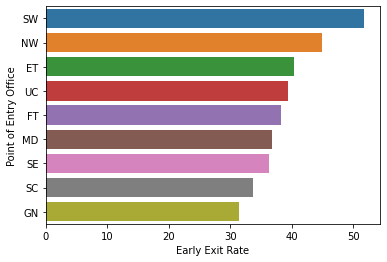

In [44]:
early_exit_rate_barplot = sns.barplot(x ="Early Exit Rate", y="POE", data = exit_rate)
plt.xlabel("Early Exit Rate")
plt.ylabel("Point of Entry Office")
plt.show


In [45]:
total_exits

,Child ID,DOB,Notification Date,Referral Age,Referral Source Type Name,Child Phase,Exit Reason,Exit Date,Exit Age,Service Coordinator,...,County Name,County SES,Tenn Region,Fiscal Year,Fiscal Year.1,Notification Month,Qtr,Notification Year,Active,3yrsindays
4,353805,2013-12-04,2016-08-05,975 days,Dept. of Health,IFSP,618 - Part B eligibility not determined,2016-12-03,1095 days,Anna Bolin,...,Putnam,Transitional,Middle,2016-2017,2016.0,Aug,1.0,2016,I,1092 days
8,354276,2013-12-24,2016-08-04,954 days,DCS,IFSP,618 - Parent withdraw,2016-09-22,1003 days,Kristi Borer,...,Blount,Transitional,Eastern,2016-2017,2016.0,Aug,1.0,2016,I,1092 days
15,358011,2014-02-02,2016-10-21,992 days,Parent,IFSP,618 - Part B eligible,2017-02-01,1095 days,Karen Stock,...,Union,At-Risk,Eastern,2016-2017,2016.0,Oct,2.0,2016,I,1092 days
16,358031,2014-01-14,2016-08-10,939 days,PCP,IFSP,618 - Part B eligible,2017-01-13,1095 days,Jennifer Terranera,...,Hamblen,Transitional,Eastern,2016-2017,2016.0,Aug,1.0,2016,I,1092 days
18,358765,2014-02-04,2016-08-17,925 days,Parent,IFSP,618 - Part B eligible,2017-02-03,1095 days,Kathy Jeffries,...,Hawkins,At-Risk,Eastern,2016-2017,2016.0,Aug,1.0,2016,I,1092 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112126,527606,2021-12-09,2022-04-27,139 days,PCP,IFSP,618 - Moved out of state,2022-06-27,200 days,Kelly Holt,...,Rutherford,Competitive,Middle,2021-2022,2021.0,Apr,4.0,2022,I,1092 days
112129,527609,2019-08-26,2022-04-27,975 days,Parent,IFSP,618 - Parent withdraw,2022-06-13,1022 days,Torkwase Smith,...,Shelby,Transitional,Western,2021-2022,2021.0,Apr,4.0,2022,I,1092 days
112174,527688,2020-04-24,2022-04-28,734 days,PCP,IFSP,618 - Parent withdraw,2022-06-08,775 days,Brittney Blalock Rose,...,Williamson,Attainment,Middle,2021-2022,2021.0,Apr,4.0,2022,I,1092 days
112689,528318,2021-09-26,2022-05-09,225 days,PCP,IFSP,618 - Attempts to contact unsuccessful,2022-07-01,278 days,Marian Kingery,...,Shelby,Transitional,Western,2021-2022,2021.0,May,4.0,2022,I,1092 days


In [46]:
SC_total_exits = total_exits[['Service Coordinator','Child ID', 'POE']]
SC_total_exits

,Service Coordinator,Child ID,POE
4,Anna Bolin,353805,UC
8,Kristi Borer,354276,ET
15,Karen Stock,358011,ET
16,Jennifer Terranera,358031,FT
18,Kathy Jeffries,358765,FT
...,...,...,...
112126,Kelly Holt,527606,SC
112129,Torkwase Smith,527609,MD
112174,Brittney Blalock Rose,527688,SC
112689,Marian Kingery,528318,MD


In [47]:
SC_TOTAL_EXITS = SC_total_exits.groupby(['POE','Service Coordinator']).count()
SC_TOTAL_EXITS

Child ID
POE Service Coordinator          
ET  Aaron Collins             153
    Adrianne McPeake           71
    Amanda Blair               30
    Amanda Cooke              112
    Amanda Cooke - PC           5
...                           ...
UC  Nicole Smith              255
    Sherry Roberts-DS           2
    Steven Scarlett           277
    Taylor Lee                271
    Taylor Watson              73

[335 rows x 1 columns]

In [48]:
SC_TOTAL_EXITS_CLEAN = SC_TOTAL_EXITS.rename(columns = {'Child ID' : 'Total Exits by SC'}).reset_index(drop = False)
SC_TOTAL_EXITS_CLEAN

,POE,Service Coordinator,Total Exits by SC
0,ET,Aaron Collins,153
1,ET,Adrianne McPeake,71
2,ET,Amanda Blair,30
3,ET,Amanda Cooke,112
4,ET,Amanda Cooke - PC,5
...,...,...,...
330,UC,Nicole Smith,255
331,UC,Sherry Roberts-DS,2
332,UC,Steven Scarlett,277
333,UC,Taylor Lee,271


In [49]:
SC_early_exits = early_exits[['POE','Service Coordinator', 'Child ID']]
SC_early_exits

,POE,Service Coordinator,Child ID
8,ET,Kristi Borer,354276
52,GN,Jennifer Johnson,364743
57,ET,Cathy Taylor,365848
67,SW,Elizabeth Hailey,368391
107,UC,Anna Bolin,379122
...,...,...,...
111980,UC,Diane Brewington,527434
112129,MD,Torkwase Smith,527609
112174,SC,Brittney Blalock Rose,527688
112689,MD,Marian Kingery,528318


In [50]:
SC_EARLY_EXITS = SC_early_exits.groupby(['POE','Service Coordinator']).count()
SC_EARLY_EXITS

Child ID
POE Service Coordinator          
ET  Aaron Collins              68
    Adrianne McPeake           37
    Amanda Blair               19
    Amanda Cooke               53
    Amanda Cooke - PC           3
...                           ...
UC  Nicole Smith               80
    Sherry Roberts-DS           2
    Steven Scarlett           132
    Taylor Lee                 80
    Taylor Watson              43

[315 rows x 1 columns]

In [51]:
SC_EARLY_EXITS_CLEAN = SC_EARLY_EXITS.rename(columns = {'Child ID' : 'Early Exits by SC'}).reset_index(drop = False)
SC_EARLY_EXITS_CLEAN

,POE,Service Coordinator,Early Exits by SC
0,ET,Aaron Collins,68
1,ET,Adrianne McPeake,37
2,ET,Amanda Blair,19
3,ET,Amanda Cooke,53
4,ET,Amanda Cooke - PC,3
...,...,...,...
310,UC,Nicole Smith,80
311,UC,Sherry Roberts-DS,2
312,UC,Steven Scarlett,132
313,UC,Taylor Lee,80


In [52]:
leftmerged = pd.merge(SC_TOTAL_EXITS_CLEAN, SC_EARLY_EXITS_CLEAN, on = ['POE','Service Coordinator'], how='left')
leftmerged

,POE,Service Coordinator,Total Exits by SC,Early Exits by SC
0,ET,Aaron Collins,153,68.0
1,ET,Adrianne McPeake,71,37.0
2,ET,Amanda Blair,30,19.0
3,ET,Amanda Cooke,112,53.0
4,ET,Amanda Cooke - PC,5,3.0
...,...,...,...,...
330,UC,Nicole Smith,255,80.0
331,UC,Sherry Roberts-DS,2,2.0
332,UC,Steven Scarlett,277,132.0
333,UC,Taylor Lee,271,80.0


In [53]:
leftmerged['SC Exit Rate'] = round(leftmerged['Early Exits by SC']/leftmerged['Total Exits by SC']*100,2)
leftmerged

,POE,Service Coordinator,Total Exits by SC,Early Exits by SC,SC Exit Rate
0,ET,Aaron Collins,153,68.0,44.44
1,ET,Adrianne McPeake,71,37.0,52.11
2,ET,Amanda Blair,30,19.0,63.33
3,ET,Amanda Cooke,112,53.0,47.32
4,ET,Amanda Cooke - PC,5,3.0,60.00
...,...,...,...,...,...
330,UC,Nicole Smith,255,80.0,31.37
331,UC,Sherry Roberts-DS,2,2.0,100.00
332,UC,Steven Scarlett,277,132.0,47.65
333,UC,Taylor Lee,271,80.0,29.52


In [54]:
leftmerged = leftmerged.loc[leftmerged['Total Exits by SC'] > 3]
leftmerged

,POE,Service Coordinator,Total Exits by SC,Early Exits by SC,SC Exit Rate
0,ET,Aaron Collins,153,68.0,44.44
1,ET,Adrianne McPeake,71,37.0,52.11
2,ET,Amanda Blair,30,19.0,63.33
3,ET,Amanda Cooke,112,53.0,47.32
4,ET,Amanda Cooke - PC,5,3.0,60.00
...,...,...,...,...,...
329,UC,Miriam Espinosa,272,96.0,35.29
330,UC,Nicole Smith,255,80.0,31.37
332,UC,Steven Scarlett,277,132.0,47.65
333,UC,Taylor Lee,271,80.0,29.52


In [55]:
UC_early_exits = leftmerged.loc[leftmerged['POE'] == 'UC'].nlargest(5, 'SC Exit Rate')
FT_early_exits = leftmerged.loc[leftmerged['POE'] == 'FT'].nlargest(5, 'SC Exit Rate')
NW_early_exits = leftmerged.loc[leftmerged['POE'] == 'NW'].nlargest(5, 'SC Exit Rate')
ET_early_exits = leftmerged.loc[leftmerged['POE'] == 'ET'].nlargest(5, 'SC Exit Rate')
GN_early_exits = leftmerged.loc[leftmerged['POE'] == 'GN'].nlargest(5, 'SC Exit Rate')
SW_early_exits = leftmerged.loc[leftmerged['POE'] == 'SW'].nlargest(5, 'SC Exit Rate')
SE_early_exits = leftmerged.loc[leftmerged['POE'] == 'SE'].nlargest(5, 'SC Exit Rate')
SC_early_exits = leftmerged.loc[leftmerged['POE'] == 'SC'].nlargest(5, 'SC Exit Rate')
MD_early_exits = leftmerged.loc[leftmerged['POE'] == 'MD'].nlargest(5, 'SC Exit Rate')
SC_top_high_earlyexits = pd.concat([UC_early_exits, FT_early_exits, NW_early_exits, ET_early_exits, GN_early_exits,
                              SW_early_exits, SE_early_exits, SC_early_exits, MD_early_exits])
SC_top_high_earlyexits

,POE,Service Coordinator,Total Exits by SC,Early Exits by SC,SC Exit Rate
334,UC,Taylor Watson,73,43.0,58.90
323,UC,Heather Craig,244,134.0,54.92
315,UC,A.J. Cowan,59,29.0,49.15
316,UC,Anna Bolin,251,121.0,48.21
332,UC,Steven Scarlett,277,132.0,47.65
84,FT,Regina Bowman,11,8.0,72.73
75,FT,Kristi Morelock,78,52.0,66.67
83,FT,Rebecca Taylor,86,54.0,62.79
86,FT,Susan St. Lawrence,10,6.0,60.00
57,FT,Amanda Royston,61,35.0,57.38


In [56]:
SC_top5_earlyexits = SC_top_high_earlyexits.reset_index(drop = True)
SC_top5_earlyexits

,POE,Service Coordinator,Total Exits by SC,Early Exits by SC,SC Exit Rate
0,UC,Taylor Watson,73,43.0,58.90
1,UC,Heather Craig,244,134.0,54.92
2,UC,A.J. Cowan,59,29.0,49.15
3,UC,Anna Bolin,251,121.0,48.21
4,UC,Steven Scarlett,277,132.0,47.65
5,FT,Regina Bowman,11,8.0,72.73
6,FT,Kristi Morelock,78,52.0,66.67
7,FT,Rebecca Taylor,86,54.0,62.79
8,FT,Susan St. Lawrence,10,6.0,60.00
9,FT,Amanda Royston,61,35.0,57.38


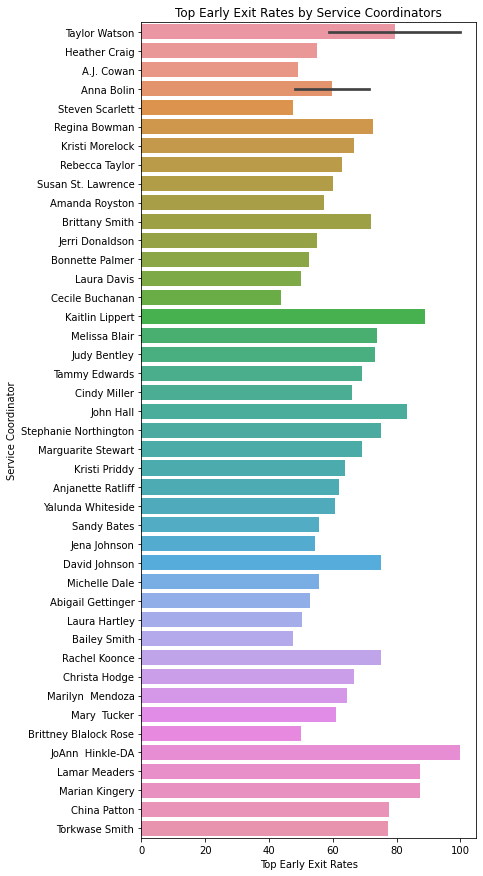

In [57]:
SC_top5_earlyexitrate_barplot = sns.barplot(x ="SC Exit Rate", y="Service Coordinator", data = SC_top5_earlyexits)
plt.xlabel("Top Early Exit Rates")
plt.ylabel("Service Coordinator")
plt.title("Top Early Exit Rates by Service Coordinators")
SC_top5_earlyexitrate_barplot.figure.set_size_inches(6, 15)
plt.show;

In [58]:
UC_data = SC_top5_earlyexits.loc[SC_top5_earlyexits['POE'] == 'UC']
UC_data

,POE,Service Coordinator,Total Exits by SC,Early Exits by SC,SC Exit Rate
0,UC,Taylor Watson,73,43.0,58.90
1,UC,Heather Craig,244,134.0,54.92
2,UC,A.J. Cowan,59,29.0,49.15
3,UC,Anna Bolin,251,121.0,48.21
4,UC,Steven Scarlett,277,132.0,47.65


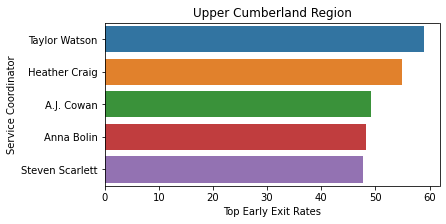

In [59]:
UC_data_barplot = sns.barplot(x ="SC Exit Rate", y="Service Coordinator", data = UC_data )
plt.xlabel("Top Early Exit Rates")
plt.ylabel("Service Coordinator")
plt.title('Upper Cumberland Region')
UC_data_barplot.figure.set_size_inches(6, 3)
plt.show;

In [60]:
FT_data = SC_top5_earlyexits.loc[SC_top5_earlyexits['POE'] == 'FT']
FT_data

,POE,Service Coordinator,Total Exits by SC,Early Exits by SC,SC Exit Rate
5,FT,Regina Bowman,11,8.0,72.73
6,FT,Kristi Morelock,78,52.0,66.67
7,FT,Rebecca Taylor,86,54.0,62.79
8,FT,Susan St. Lawrence,10,6.0,60.00
9,FT,Amanda Royston,61,35.0,57.38


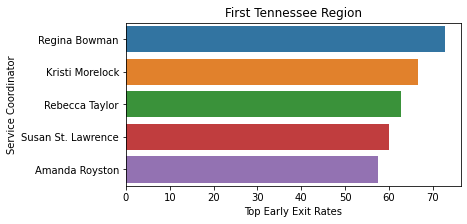

In [61]:
FT_data_barplot = sns.barplot(x ="SC Exit Rate", y="Service Coordinator", data = FT_data )
plt.xlabel("Top Early Exit Rates")
plt.ylabel("Service Coordinator")
plt.title('First Tennessee Region')
FT_data_barplot.figure.set_size_inches(6, 3)
plt.show;

In [62]:
NW_data = SC_top5_earlyexits.loc[SC_top5_earlyexits['POE'] == 'NW']
NW_data

,POE,Service Coordinator,Total Exits by SC,Early Exits by SC,SC Exit Rate
10,NW,Brittany Smith,25,18.0,72.00
11,NW,Jerri Donaldson,203,112.0,55.17
12,NW,Bonnette Palmer,244,128.0,52.46
13,NW,Laura Davis,150,75.0,50.00
14,NW,Cecile Buchanan,245,107.0,43.67


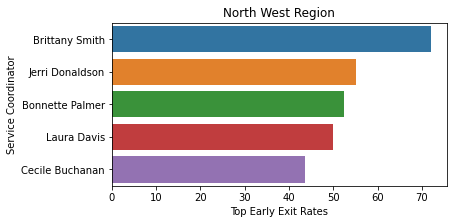

In [63]:
NW_data_barplot = sns.barplot(x ="SC Exit Rate", y="Service Coordinator", data = NW_data )
plt.xlabel("Top Early Exit Rates")
plt.ylabel("Service Coordinator")
plt.title('North West Region')
NW_data_barplot.figure.set_size_inches(6, 3)
plt.show;

In [64]:
ET_data = SC_top5_earlyexits.loc[SC_top5_earlyexits['POE'] == 'ET']
ET_data

,POE,Service Coordinator,Total Exits by SC,Early Exits by SC,SC Exit Rate
15,ET,Kaitlin Lippert,9,8.0,88.89
16,ET,Melissa Blair,23,17.0,73.91
17,ET,Judy Bentley,15,11.0,73.33
18,ET,Tammy Edwards,42,29.0,69.05
19,ET,Cindy Miller,141,93.0,65.96


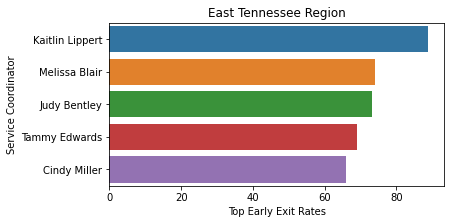

In [65]:
ET_data_barplot = sns.barplot(x ="SC Exit Rate", y="Service Coordinator", data = ET_data )
plt.xlabel("Top Early Exit Rates")
plt.ylabel("Service Coordinator")
plt.title('East Tennessee Region')
ET_data_barplot.figure.set_size_inches(6, 3)
plt.show;

In [66]:
GN_data = SC_top5_earlyexits.loc[SC_top5_earlyexits['POE'] == 'GN']
GN_data

,POE,Service Coordinator,Total Exits by SC,Early Exits by SC,SC Exit Rate
20,GN,Taylor Watson,4,4.0,100.00
21,GN,John Hall,6,5.0,83.33
22,GN,Stephanie Northington,4,3.0,75.00
23,GN,Anna Bolin,7,5.0,71.43
24,GN,Marguarite Stewart,13,9.0,69.23


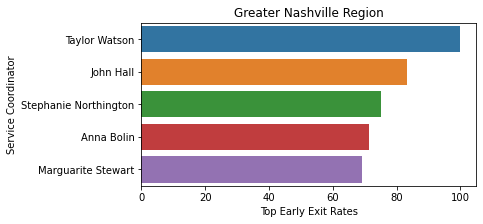

In [67]:
GN_data_barplot = sns.barplot(x ="SC Exit Rate", y="Service Coordinator", data = GN_data )
plt.xlabel("Top Early Exit Rates")
plt.ylabel("Service Coordinator")
plt.title('Greater Nashville Region')
GN_data_barplot.figure.set_size_inches(6, 3)
plt.show;

In [68]:
SW_data = SC_top5_earlyexits.loc[SC_top5_earlyexits['POE'] == 'SW']
SW_data

,POE,Service Coordinator,Total Exits by SC,Early Exits by SC,SC Exit Rate
25,SW,Kristi Priddy,335,214.0,63.88
26,SW,Anjanette Ratliff,21,13.0,61.90
27,SW,Yalunda Whiteside,272,165.0,60.66
28,SW,Sandy Bates,243,135.0,55.56
29,SW,Jena Johnson,11,6.0,54.55


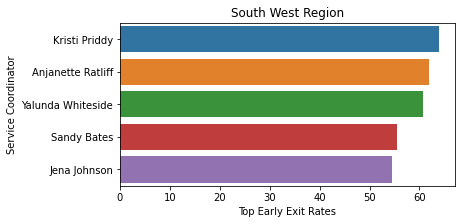

In [69]:
SW_data_barplot = sns.barplot(x ="SC Exit Rate", y="Service Coordinator", data = SW_data )
plt.xlabel("Top Early Exit Rates")
plt.ylabel("Service Coordinator")
plt.title('South West Region')
SW_data_barplot.figure.set_size_inches(6, 3)
plt.show;

In [70]:
SE_data = SC_top5_earlyexits.loc[SC_top5_earlyexits['POE'] == 'SE']
SE_data

,POE,Service Coordinator,Total Exits by SC,Early Exits by SC,SC Exit Rate
30,SE,David Johnson,36,27.0,75.00
31,SE,Michelle Dale,9,5.0,55.56
32,SE,Abigail Gettinger,17,9.0,52.94
33,SE,Laura Hartley,127,64.0,50.39
34,SE,Bailey Smith,97,46.0,47.42


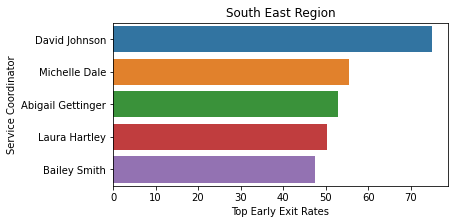

In [71]:
SE_data_barplot = sns.barplot(x ="SC Exit Rate", y="Service Coordinator", data = SE_data )
plt.xlabel("Top Early Exit Rates")
plt.ylabel("Service Coordinator")
plt.title('South East Region')
SE_data_barplot.figure.set_size_inches(6, 3)
plt.show;

In [72]:
SC_data = SC_top5_earlyexits.loc[SC_top5_earlyexits['POE'] == 'SC']
SC_data

,POE,Service Coordinator,Total Exits by SC,Early Exits by SC,SC Exit Rate
35,SC,Rachel Koonce,12,9.0,75.00
36,SC,Christa Hodge,9,6.0,66.67
37,SC,Marilyn Mendoza,31,20.0,64.52
38,SC,Mary Tucker,23,14.0,60.87
39,SC,Brittney Blalock Rose,84,42.0,50.00


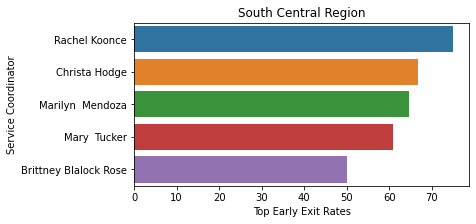

In [73]:
SC_data_barplot = sns.barplot(x ="SC Exit Rate", y="Service Coordinator", data = SC_data )
plt.xlabel("Top Early Exit Rates")
plt.ylabel("Service Coordinator")
plt.title('South Central Region')
SC_data_barplot.figure.set_size_inches(6, 3)
plt.show;

In [74]:
MD_data = SC_top5_earlyexits.loc[SC_top5_earlyexits['POE'] == 'MD']
MD_data

,POE,Service Coordinator,Total Exits by SC,Early Exits by SC,SC Exit Rate
40,MD,JoAnn Hinkle-DA,11,11.0,100.00
41,MD,Lamar Meaders,8,7.0,87.50
42,MD,Marian Kingery,55,48.0,87.27
43,MD,China Patton,18,14.0,77.78
44,MD,Torkwase Smith,22,17.0,77.27


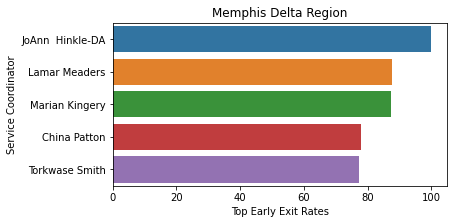

In [75]:
MD_data_barplot = sns.barplot(x ="SC Exit Rate", y="Service Coordinator", data = MD_data )
plt.xlabel("Top Early Exit Rates")
plt.ylabel("Service Coordinator")
plt.title('Memphis Delta Region')
MD_data_barplot.figure.set_size_inches(6, 3)
plt.show;

In [76]:
##total exits by county/region 
totalexitbycounty

NameError: name 'totalexitbycounty' is not defined

In [ ]:
##total exits
wtotal= totalexitbycounty[['POE', 'Child ID']]
wtotal

In [ ]:
type(wtotal)

In [ ]:
pd.merge('dearly','wtotal', on = ['POE'], how = "outer")

In [ ]:
pd.merge(dearly,wtotal)

### percent of early exits by county/region compared to total exits by county/region

In [ ]:
sns.set_theme(style = 'whitegrid')
percent_early_exit_graph= sns.barplot(x=)

In [ ]:
dict1 = {"POE":["percentET1", "percentFT1", "percentGN1","percentMD1","percentNW1","percentSC1","percentSE1","percentSW1","percentUC1"],

        "Percent_early_exits_bycountytotal":[35,35,31,33,40,30,34,44,35]

        };
dataFrame = pd.DataFrame(data = dict1);
dataFrame.plot.bar(x="POE", y="Percent_early_exits_bycountytotal", rot=70, title="early_exits_to_totalbycounty");

plot.show(block=True);

### percent of early exits by county/region compared to total early exits

In [ ]:
dict1 = {"POE":["percentET", "percentFT", "percentGN","percentMD","percentNW","percentSC","percentSE","percentSW","percentUC"],

        "Percent_early_exits":[17,11,15,13,5,14,8,7,10]

        };
dataFrame = pd.DataFrame(data = dict1);
dataFrame.plot.bar(x="POE", y="Percent_early_exits", rot=70, title="early_exits_to_total");

plot.show(block=True);

In [ ]:
d = z.groupby('Service Coordinator').count().reset_index(drop = False).sort_values(by= 'Child ID', ascending  = False)
d

In [ ]:
d.head(5)

In [ ]:
dict1 = {"POE":["percentET", "percentFT", "percentGN","percentMD","percentNW","percentSC","percentSE","percentSW","percentUC"],

        "Percent_early_exits":[17,11,15,13,5,14,8,7,10]

        };
dataFrame = pd.DataFrame(data = dict1);
dataFrame.plot.bar(x="POE", y="Percent_early_exits", rot=70, title="total_early_exits");

plot.show(block=True);

## Do the count for individual POEs'

In [ ]:
#pull the data just for ET
FT = dfs.loc[dfs['POE'] == 'FT']
FT

In [ ]:
forQ5a = FT.loc[FT['Child Phase'] == 'IFSP']
forQ5a

In [ ]:
forQ5exitdate2 = forQ5a[forQ5a["Exit Age"] < forQ5a["3yrsindays"]]
forQ5exitdate2

In [ ]:
forQ5exitdate2['Child ID'].count()

#### get the same result with the code 
forQ5exitdate2 = forQ5.loc[forQ5['Exit Date'] < forQ5['third DOB']]
forQ5exitdate2

In [ ]:
FTgraph = forQ5exitdate2.groupby('Service Coordinator').count().reset_index(drop = False)
FTgraph

In [ ]:
FTgraphfinal = FTgraph[['Service Coordinator', 'Child ID']].sort_values(by= 'Child ID', ascending  = False).head()
FTgraphfinal 

In [ ]:
FTgraphfinal['POE'] = 'FT'
FTgraphfinal

In [ ]:
GN = dfs.loc[dfs['POE'] == 'GN']
GN

In [ ]:
forQ5b = GN.loc[GN['Child Phase'] == 'IFSP']
forQ5b

In [ ]:
forQ5exitdate3 = forQ5b[forQ5b["Exit Age"] < forQ5b["3yrsindays"]]
forQ5exitdate3

In [ ]:
forQ5exitdate3['Child ID'].count()

In [ ]:
GNgraph = forQ5exitdate3.groupby('Service Coordinator').count().reset_index(drop = False)
GNgraph

In [ ]:
GNgraphfinal = GNgraph[['Service Coordinator', 'Child ID']].sort_values(by= 'Child ID', ascending  = False).head()
GNgraphfinal

In [ ]:
GNgraphfinal['POE'] = 'GN'
GNgraphfinal

In [ ]:
MD = dfs.loc[dfs['POE'] == 'MD']
MD

In [ ]:
forQ5c = MD.loc[MD['Child Phase'] == 'IFSP']
forQ5c

In [ ]:
forQ5exitdate4 = forQ5c[forQ5c["Exit Age"] < forQ5c["3yrsindays"]]
forQ5exitdate4

In [ ]:
MDgraph = forQ5exitdate4.groupby('Service Coordinator').count().reset_index(drop = False)
MDgraph

In [ ]:
MDgraphfinal = MDgraph[['Service Coordinator', 'Child ID']].sort_values(by= 'Child ID', ascending  = False).head()
MDgraphfinal

In [ ]:
MDgraphfinal['POE'] = 'MD'
MDgraphfinal

In [ ]:
NW = dfs.loc[dfs['POE'] == 'NW']
NW

In [ ]:
forQ5d = NW.loc[NW['Child Phase'] == 'IFSP']
forQ5d

In [ ]:
forQ5exitdate5 = forQ5d[forQ5d["Exit Age"] < forQ5d["3yrsindays"]]
forQ5exitdate5

In [ ]:
NWgraph = forQ5exitdate5.groupby('Service Coordinator').count().reset_index(drop = False)
NWgraph

In [ ]:
NWgraphfinal = NWgraph[['Service Coordinator', 'Child ID']].sort_values(by= 'Child ID', ascending  = False).head()
NWgraphfinal

In [ ]:
NWgraphfinal['POE'] = 'NW'
NWgraphfinal

In [ ]:
SC = dfs.loc[dfs['POE'] == 'SC']
SC

In [ ]:
forQ5e = SC.loc[SC['Child Phase'] == 'IFSP']
forQ5e

In [ ]:
forQ5exitdate6 = forQ5e[forQ5e["Exit Age"] < forQ5e["3yrsindays"]]
forQ5exitdate6

In [ ]:
SCgraph = forQ5exitdate6.groupby('Service Coordinator').count().reset_index(drop = False)
SCgraph

In [ ]:
SCgraphfinal = SCgraph[['Service Coordinator', 'Child ID']].sort_values(by= 'Child ID', ascending  = False).head()
SCgraphfinal

In [ ]:
SCgraphfinal['POE'] = 'SC'
SCgraphfinal

In [ ]:
SE = dfs.loc[dfs['POE'] == 'SE']
SE

In [ ]:
forQ5f = SE.loc[SE['Child Phase'] == 'IFSP']
forQ5f

In [ ]:
forQ5exitdate7 = forQ5f[forQ5f["Exit Age"] < forQ5f["3yrsindays"]]
forQ5exitdate7

In [ ]:
SEgraph = forQ5exitdate7.groupby('Service Coordinator').count().reset_index(drop = False)
SEgraph

In [ ]:
SEgraphfinal = SEgraph[['Service Coordinator', 'Child ID']].sort_values(by= 'Child ID', ascending  = False).head()
SEgraphfinal

In [ ]:
SEgraphfinal['POE'] = 'SE'
SEgraphfinal

In [ ]:
SW = dfs.loc[dfs['POE'] == 'SW']
SW

In [ ]:
forQ5g = SW.loc[SW['Child Phase'] == 'IFSP']
forQ5g

In [ ]:
forQ5exitdate8 = forQ5g[forQ5g["Exit Age"] < forQ5g["3yrsindays"]]
forQ5exitdate8

In [ ]:
SWgraph = forQ5exitdate8.groupby('Service Coordinator').count().reset_index(drop = False)
SWgraph

In [ ]:
SWgraphfinal = SWgraph[['Service Coordinator', 'Child ID']].sort_values(by= 'Child ID', ascending  = False).head()
SWgraphfinal

In [ ]:
SWgraphfinal['POE'] = 'SW'
SWgraphfinal

In [ ]:
UC = dfs.loc[dfs['POE'] == 'UC']
UC

In [ ]:
forQ5h = UC.loc[UC['Child Phase'] == 'IFSP']
forQ5h

In [ ]:
forQ5exitdate9 = forQ5h[forQ5h["Exit Age"] < forQ5h["3yrsindays"]]
forQ5exitdate9

In [ ]:
UCgraph = forQ5exitdate9.groupby('Service Coordinator').count().reset_index(drop = False)
UCgraph

In [ ]:
UCgraphfinal = UCgraph[['Service Coordinator', 'Child ID']].sort_values(by= 'Child ID', ascending  = False).head()
UCgraphfinal

In [ ]:
UCgraphfinal['POE'] = 'UC'
UCgraphfinal

In [ ]:
ET = dfs.loc[dfs['POE'] == 'ET']
ET

In [ ]:
forQ5i = ET.loc[ET['Child Phase'] == 'IFSP']
forQ5i

In [ ]:
forQ5exitdate10 = forQ5i[forQ5i["Exit Age"] < forQ5i["3yrsindays"]]
forQ5exitdate10

In [ ]:
forQ5exitdate10['Child ID'].count()

In [ ]:
ETgraph = forQ5exitdate10.groupby('Service Coordinator').count().reset_index(drop = False)
ETgraph

In [ ]:
ETgraphfinal = ETgraph[['Service Coordinator', 'Child ID']].sort_values(by= 'Child ID', ascending  = False).head()
ETgraphfinal

In [ ]:
ETgraphfinal['POE'] = 'ET'
ETgraphfinal

### final answer to QN :5

In [ ]:
CONCAT = pd.concat([FTgraphfinal,ETgraphfinal,GNgraphfinal,MDgraphfinal,NWgraphfinal,SCgraphfinal,SEgraphfinal,SWgraphfinal,UCgraphfinal])
CONCAT

In [ ]:
facetgrid = sns.FacetGrid(CONCAT, col ='POE')
facetgrid.map(sns.regplot, 'Child ID').add_legend()
plt.show();

In [ ]:
SCATTERPLOT1 = plt.scatter(CONCAT['POE'],CONCAT['Child ID'])
plt.xlabel = 'POE'
plt.ylabel = 'Early_exits'
plt.title = 'total_early_exits_by_POE'
plt.show()

### Q4:Look for patterns in referrals and re-referrals on the basis of the following:age, referral source, socioeconomic status (County SES)

#### LOOK AT INFORMATION FOR POE - ET

In [ ]:
#pull the data just for ET
ET1 = TEIS_df.loc[TEIS_df['POE'] == 'ET']
ET1

In [ ]:
ET1columns = ET1.columns
ET1columns

In [ ]:
# sort the data based on Child ID, TOP5
ET1sortedID = ET1.sort_values(by = 'Child ID', ascending = False)
ET1sortedID.head()

In [ ]:
# sort the data based on Child ID, Bottom 5
ET1sortedID = ET1.sort_values(by = 'Child ID', ascending = False)
ET1sortedID.tail()

In [ ]:
ET1sortedID['Initial Eligibility Date'].value_counts()

In [ ]:
ET2 = TEIS_July2022.loc[TEIS_July2022['POE'] == 'ET']
ET2

In [ ]:
ET2columns = ET2.columns
ET2columns

In [ ]:
ET2new = ET2.rename(columns = {'Notification Date' : 'Notification/ Referral Date','County SES ' : 'County SES'})
ET2new

In [ ]:
ET2newsortedID = ET2new.sort_values(by = 'Child ID', ascending = False)
ET2newsortedID.head()

In [ ]:
ET2newsortedID = ET2new.sort_values(by = 'Child ID', ascending = False)
ET2newsortedID.tail()

In [ ]:
ET1active_series = ET1['Active'].value_counts()
ET1active_series

In [ ]:
ET1active_df = ET1active_series.to_frame()
ET1active_df

In [ ]:
ET2active_series = ET2['Active'].value_counts()
ET2active_series

In [ ]:
ET2active_df = ET2active_series.to_frame()
ET2active_df

In [ ]:
ET1child_phase_series = ET1['Child Phase'].value_counts()
ET1child_phase_series

In [ ]:
ET1child_phase_df = ET1child_phase_series.to_frame()
ET1child_phase_df

In [ ]:
ET2child_phase_series = ET2['Child Phase'].value_counts()
ET2child_phase_series

In [ ]:
ET2child_phase_df = ET2child_phase_series.to_frame()
ET2child_phase_df

In [ ]:
ID403339 = ET1.loc[ET1['Child ID'] == 403339]
ID403339

In [ ]:
ET2.loc[ET2['Child ID'].isin(ID403339["Child ID"])]

In [ ]:
ET1sortedID.dtypes

In [ ]:
ET2newsortedID.dtypes

In [ ]:
ET1sortedID["Initial Eligibility Date"] = ET1sortedID["Initial Eligibility Date"].astype("datetime64[ns]")

In [ ]:
for ind, row in ET1sortedID.iterrows():
    if re.search('\d{5}', str(row['Exit Date'])):
        ET1sortedID.loc[ind, 'Exit Date'] = np.NaN
        
ET1sortedID["Exit Date"] = pd.to_datetime(ET1sortedID["Exit Date"])

In [ ]:
for ind, row in ET1sortedID.iterrows():
    if re.search('\d{5}', str(row['Initial Eligibility Date'])):
        ET1sortedID.loc[ind, 'Initial Eligibility Date'] = np.NaN
        
ET1sortedID["Initial Eligibility Date"] = pd.to_datetime(ET1sortedID["Initial Eligibility Date"])

In [ ]:
for ind, row in ET1sortedID.iterrows():
    if re.search('\d{5}', str(row['Initial IFSP Date'])):
        ET1sortedID.loc[ind, 'Initial IFSP Date'] = np.NaN
        
ET1sortedID["Initial IFSP Date"] = pd.to_datetime(ET1sortedID["Initial IFSP Date"])

In [ ]:
for ind, row in ET1sortedID.iterrows():
    if re.search('\d{5}', str(row['Latest IFSP Date'])):
        ET1sortedID.loc[ind, 'Latest IFSP Date'] = np.NaN
        
ET1sortedID["Latest IFSP Date"] = pd.to_datetime(ET1sortedID["Latest IFSP Date"])

In [ ]:
#MERGE -create a df based on child ID from ET1 and ET2
merged = pd.merge(ET1sortedID, ET2newsortedID, on = ['POE', 'Child ID', 'DOB', 'County Name', 'County SES', 'Child Phase',
       'Active', 'Service Coordinator', 'Notification/ Referral Date',
       'Parent Consent Date', 'Referral Source Type Name',
       'Initial Eligibility', 'Initial Eligibility Date', 'Initial IFSP Date',
       'Latest IFSP Date', 'Exit Reason', 'Exit Date'],how = 'outer')
merged

In [ ]:
merged.sort_values('Child ID')

In [ ]:
ET1columns = ET1.columns
ET1columns

In [ ]:
ET2columns = ET2.columns
ET2columns

####  explore the referrals data and search for any patterns in referrals and re-referrals

In [ ]:
merged.columns

In [ ]:
cleaned = merged.drop(columns = ['Fiscal Year','Service Coordinator Counter','2012 Child Count', '2013 Child Count', 'third DOB', 'Qtr','Referral Source Category'])
cleaned

In [ ]:
cleaned.columns

In [ ]:
mergedsome1 = cleaned[['Child Phase','Referral Source Type Name','Notification/ Referral Date','Exit Reason', 'Exit Date','Notification Month','Fiscal Year.1']]
mergedsome1

#### Total pts in ET = 31552

In [ ]:
cleaned.groupby('County Name').count()

In [ ]:
cleaned_series = cleaned['Active'].value_counts()
cleaned_series

In [ ]:
mergedsome1phase_series = mergedsome1['Child Phase'].value_counts()
mergedsome1phase_series

In [ ]:
mergedsome1.groupby('Notification/ Referral Date').count()

In [ ]:
mergedsome1refsource_series = mergedsome1['Referral Source Type Name'].value_counts()
mergedsome1refsource_series

In [ ]:
cleaned = merged.drop(columns = ['Fiscal Year','Service Coordinator Counter','2012 Child Count', '2013 Child Count', 'Qtr','Referral Source Category'])
cleaned.columns

###### TEIS provides services to eligible infants and toddlers from birth to age 3. Are there any POE or service coordinators with high rates of early closure (a child exiting before reaching age 3)? For this question, only consider cases which have reached the IFSP phase.

In [ ]:
forQ5 = cleaned.loc[cleaned['Child Phase'] == 'IFSP']
forQ5

In [ ]:
forQ5exitdate1 = forQ5.query("`Exit Date` < `third DOB`")
forQ5exitdate1

In [ ]:
forQ5.dtypes

In [ ]:
forQ5exitdate2 = forQ5.loc[forQ5['Exit Date'] < forQ5['third DOB']]
forQ5exitdate2

In [ ]:
forQ5exitdate1.groupby('Service Coordinator').count()